In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 703.8MB 21kB/s 
     |████████████████████████████████| 6.6MB 685kB/s 
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 276kB 9.2MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44076 sha256=38c11419ef986714fbba3b6e6fc0a9930ab85d42bdb469d67f327d8b73b67871
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-

In [4]:
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2MB 6.6MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201216-cp36-none-any.whl size=40706 sha256=b96109c9d0469ea1045922d9a3f0f8130e6b71f54348b8ec1ca31896ce403872
  Stored in directory: /root/.cache/pip/wheels/6d/61/fe/386de64af40c13e988b60eb21c1aee13b128dadf0c86629863
  Created wheel for iopath: filename=iopath-0.1.2-cp36-none-any.whl size=10505 sha256=e2e8c88ecbd2260c12edbddb13f2a2976fa5e45d90307bad09f9cee4e40448c7
  Stored in directory: /root/.cache/pip/wheels/9e/01/e4/1b68f5a2a6b9450ea4246d91840a77e1169f7d4722d76bbc47
Successfully built fvcore iopath


In [5]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [ ]:
#import data from foboflow
!curl -L "https://app.roboflow.com/ds/2XnNts8bUm?key=uIcNoUJeZo" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1159      0 --:--:-- --:--:-- --:--:--  1157
100  109M  100  109M    0     0  52.6M      0  0:00:02  0:00:02 --:--:-- 92.2M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/000000108_jpg.rf.1614b6b83bdbb193d5efcc67c7747b09.jpg  
 extracting: test/000000109_jpg.rf.f0dd5bfb4066db501f9404e61c330a7b.jpg  
 extracting: test/000000110_jpg.rf.b0efb2b14957225bb8bd7306e06282ed.jpg  
 extracting: test/000000111_jpg.rf.eb91bab7522a41844e5736b236f078cd.jpg  
 extracting: test/000000112_jpg.rf.939bbfc268647549d43b5f39df4b9689.jpg  
 extracting: test/000000113_jpg.rf.008b951a2e3341934eb5f8d9be75c68a.jpg  
 extracting: test/000000114_jpg.rf.ae2c2c84374dfbb517af13bf86bf684d.jpg  
 extracting: test/000000115_jpg.rf.4faa00333096361d4a31356ee3e2bf40.jpg  
 extracting:

In [ ]:
#register data
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/drive/MyDrive/ML/train/_annotations.coco.json", "/content/drive/MyDrive/ML/train")
register_coco_instances("my_dataset_val", {}, "/content/drive/MyDrive/ML/valid/_annotations.coco.json", "/content/drive/MyDrive/ML/valid")
register_coco_instances("my_dataset_test", {}, "/content/drive/MyDrive/ML/test/_annotations.coco.json", "/content/drive/MyDrive/ML/test")


WARNING [12/15 06:04:59 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/15 06:04:59 d2.data.datasets.coco]: Loaded 944 images in COCO format from /content/drive/MyDrive/ML/train/_annotations.coco.json


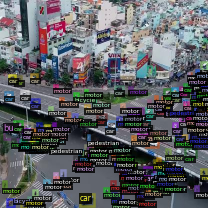

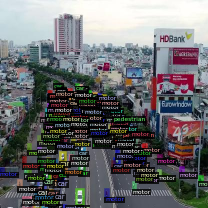

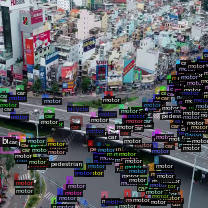

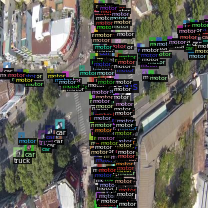

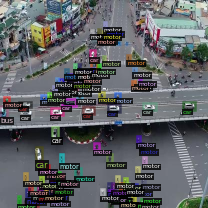

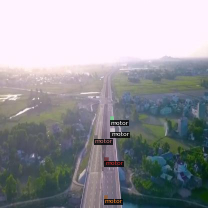

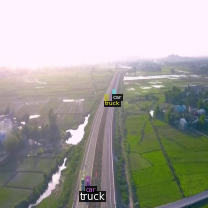

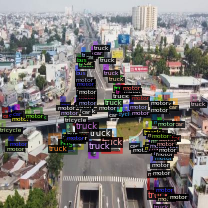

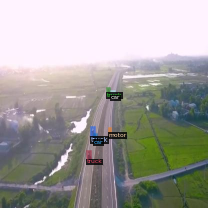

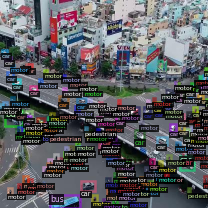

In [ ]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 10): #get 10 images
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [13]:
#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [19]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.config import get_cfg
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = ("content/drive/MyDrive/ML/output/model_0009999.pth")  # get model weigth that you have saved
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.2


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 10100 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (0,1200,4000,8000,10000,11500) # 0.0 0.002 0.0002... 
cfg.SOLVER.GAMMA = 0.1 #LR = BASE_LR * GAMMA **step 


cfg.SOLVER.CHECKPOINT_PERIOD = 500
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128     #How many images u put in a batch.  
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 13 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

[12/16 07:51:39 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

In [20]:
#test evaluation
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [12/16 07:52:08 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/16 07:52:08 d2.data.datasets.coco]: Loaded 402 images in COCO format from /content/drive/MyDrive/ML/test/_annotations.coco.json
[12/16 07:52:08 d2.data.common]: Serializing 402 elements to byte tensors and concatenating them all ...
[12/16 07:52:08 d2.data.common]: Serialized dataset takes 1.06 MiB
[12/16 07:52:08 d2.evaluation.evaluator]: Start inference on 402 images
[12/16 07:52:11 d2.evaluation.evaluator]: Inference done 11/402. 0.1781 s / img. ETA=0:01:10
[12/16 07:52:16 d2.evaluation.evaluator]: Inference done 39/402. 0.1787 s / img. ETA=0:01:05
[12/16 07:52:21 d2.evaluation.evaluator]: Inference done 67/402. 0.1790 s / img. ETA=0:01:00
[12/16 07:52:26 d2.evaluation.evaluator]: Inference done 95/402. 0.1794 s / img. ETA=0:00:55
[12/16 07:52:31 d2.evaluation.evaluator]: Inference done 123/402. 0.1797 s / img. ETA=0:00:50
[12/16 07:52:36 d2.e

OrderedDict([('bbox',
              {'AP': 8.987008533162363,
               'AP-bicycle': 0.0,
               'AP-bus': 32.07498734761792,
               'AP-car': 25.796235017326012,
               'AP-moto': 0.0,
               'AP-motor': 9.708531842140392,
               'AP-object': nan,
               'AP-other': 0.0,
               'AP-others': 0.0,
               'AP-pedestrian': 0.19801980198019803,
               'AP-tricycle': 6.2471406627257355,
               'AP-truck': 22.057227962145852,
               'AP-van': 2.7749512308498803,
               'AP-vehicles': nan,
               'AP50': 17.877841379397225,
               'AP75': 7.99032138023893,
               'APl': 0.0,
               'APm': 29.42035439575078,
               'APs': 9.347126178613289})])

In [ ]:
#Save model 
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")

In [18]:
from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('/content/drive/MyDrive/ML/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])


Output hidden; open in https://colab.research.google.com to view.